In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pathlib  
import glob
import matplotlib.pyplot as plt

In [ ]:
dir= "/content/drive/Shareddrives/A&D co./BD/Database/results"

In [ ]:
def plot_batches(y1,y2,y3, dir,col,title,epochs = list(range(1,51))):
  plt.plot(epochs, y1, label = "batch = 32")
  plt.plot(epochs,y2, label = "batch = 64")
  plt.plot(epochs,y3,label = "batch = 128")
  plt.xlabel('epochs')
  plt.ylabel(col)
  plt.title(col+" for various batch sizes "+title)
  plt.legend()
  plt.savefig(dir+"_"+col +".png", dpi=300, bbox_inches='tight')
  plt.show()

In [ ]:
res18 = list(dir.glob('ResNet18/*.csv'))
res34 = list(dir.glob('ResNet34/*.csv'))
res50 = list(dir.glob('ResNet50/*.csv'))
res101 = list(dir.glob('ResNet101/*.csv'))

l = [res18, res34, res50, res101]

In [ ]:
i = 0
d18 = pd.DataFrame()
d34 = pd.DataFrame()
d50 = pd.DataFrame()
d101 = pd.DataFrame()
for res in l:
  for csv in res:
    dummy = pd.read_csv(csv)
    if i==0:
      d18 = d18.append(dummy,ignore_index = True)
    elif i == 1:
      d34 = d34.append(dummy,ignore_index=True)
    elif i ==2:
      d50 = d50.append(dummy, ignore_index = True)
    elif i == 3:
      d101 = d101.append(dummy, ignore_index = True)
  i+=1   


  

/content/drive/Shareddrives/A&D co./BD/Database/results/ResNet34/ResNet34V2_32_0.942643404006958.csv
/content/drive/Shareddrives/A&D co./BD/Database/results/ResNet34/ResNet34V2_64_0.9451371431350708.csv
/content/drive/Shareddrives/A&D co./BD/Database/results/ResNet34/ResNet34V2_128_0.9376558661460876.csv


In [ ]:
dfs = [d18,d34,d50,d101]
layers = [18,34,50,101]

/content/drive/Shareddrives/A&D co./BD/Database/results/ResNet34/
     validation loss  validation accuracy  epochs
0           2.862066             0.384040       1
1           1.021165             0.684539       2
2           0.669814             0.780549       3
3           0.576008             0.836658       4
4           0.819807             0.759352       5
..               ...                  ...     ...
145         0.351289             0.931421      46
146         0.431996             0.911471      47
147         0.591046             0.887781      48
148         0.499637             0.882793      49
149         0.647603             0.886534      50

[150 rows x 3 columns]


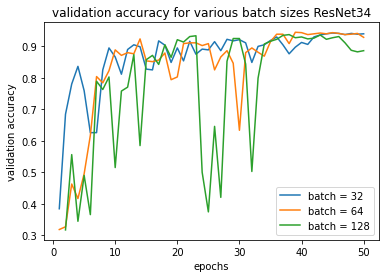

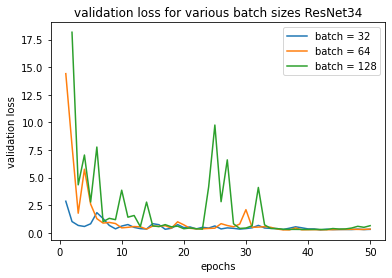

In [ ]:
i = 0
for df in dfs:
  save_dir = str(dir) +"/"+"ResNet"+str(layers[i])+"/"
  for col in ["validation accuracy","validation loss"]:
     a = df.loc[0:49,[col]]
     b = df.loc[50:99,[col]]
     c = df.loc[100:,[col]]
     plot_batches(a,b,c,save_dir,col,"ResNet"+str(layers[i]))
  i+=1
  



